Project Question:  
What if we took out one member--say, gave him a free Netflix subscription or got him hooked on playing a particularly addictive video game. What would the resulting effect on the network as a whole be? How would we choose the best person to target? What would be the effect of the intervention be?


From this project we want to know how does removing the key node from a network impact the whole network.
To achieve this, we are going to choose a network from the covert networks website and analyse it.

In [1]:
#import libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import urllib.request as urllib
import io
from  io import BytesIO
from zipfile import ZipFile


For my dataset of choice I chose one named  Galesburg drug study. It is a network that comes from a Columbia University drug study to investigate the diffusion of a new drug (gammanym) was investigated.

 The network has 17 vertices (physicians), 35 edges (blue - friendship, red - discussion tie), no arcs, no loops, no line values.


In [2]:
!pip install -q gdown
import gdown

file_id = '19DgNl9x5Lh7v2myFlRexdo1nHxym2xQj'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'myfile.zip'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=19DgNl9x5Lh7v2myFlRexdo1nHxym2xQj
To: /content/myfile.zip
100%|██████████| 611/611 [00:00<00:00, 2.09MB/s]


'myfile.zip'

In [3]:
import zipfile

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

In [4]:
G = nx.read_pajek("/content/extracted_folder/Galesburg.paj", encoding='latin-1')
G = nx.DiGraph(G)
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Is directed?", G.is_directed())

Nodes: 20
Edges: 29
Is directed? True


Now we will draw the network

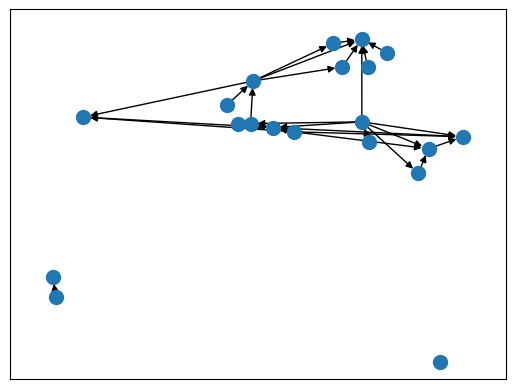

In [27]:
nx.draw_networkx(G, with_labels=False, node_size = 100)

Now we will obtain the centrality measures
we will calculate the:

1. Clustering coefficient which measures how tightly connected neighbors are.

2. Shortest path

3. Betweenness centrality- How often a node lies on shortest paths between others.

4. Degree centrality - How many connections each node has.

5. Eigenvector centrality - How central a node is considering the centrality of its neighbors.



In [15]:

print(nx.average_clustering(G))
print(nx.shortest_path(G))
print(nx.betweenness_centrality(G))
print(nx.degree_centrality(G))
print(nx.eigenvector_centrality(G, max_iter=1000))


0.1505952380952381
<generator object all_pairs_shortest_path at 0x7e7f4906d030>
{'v1': 0.0, 'v2': 0.0, 'v3': 0.0, 'v4': 0.0, 'v5': 0.029239766081871343, 'v6': 0.02631578947368421, 'v7': 0.05263157894736842, 'v8': 0.0, 'v9': 0.0, 'v10': 0.0, 'v11': 0.06140350877192982, 'v12': 0.0, 'v13': 0.0, 'v14': 0.0029239766081871343, 'v15': 0.0, 'v16': 0.0, 'v18': 0.0, '*Partition': 0.0, 'Galesburg_adoptiontime.clu': 0.0, '*Vertices': 0.0}
{'v1': 0.05263157894736842, 'v2': 0.05263157894736842, 'v3': 0.2631578947368421, 'v4': 0.05263157894736842, 'v5': 0.3684210526315789, 'v6': 0.3157894736842105, 'v7': 0.21052631578947367, 'v8': 0.10526315789473684, 'v9': 0.05263157894736842, 'v10': 0.0, 'v11': 0.3157894736842105, 'v12': 0.10526315789473684, 'v13': 0.15789473684210525, 'v14': 0.21052631578947367, 'v15': 0.21052631578947367, 'v16': 0.10526315789473684, 'v18': 0.3157894736842105, '*Partition': 0.05263157894736842, 'Galesburg_adoptiontime.clu': 0.05263157894736842, '*Vertices': 0.05263157894736842}
{'

It appears that within the Galesburg.paj, there are 2 other files namely; Galesburg_adoptiontime.clu, Partition and Vertices. Which makes the network cluster make sense. It appears that the nodes are labeled v1 - v18. So we want to remove these from the analysis as they are not part of the network.

This makes sense because the dataset background mentioned there would be 2 files within Galesburg.paj i.e

"'The file Galesburg.net contains a network of friendship (blue) and discussion ties (red) between 17 physicians who adopted the new drug in Galesburg (Illinois) in the 1950s.

:The partition Galesburg_adoptiontime.clu specifies the number of months since the introduction of the new drug at which the physician first prescribed the drug. This is considered to be their adoption time."

So we are interested in the Galesburg.net which is the network of friendships and discussion ties between the physicians.

Since betweenness centrality quantifies the importance of a node in terms of its ability to act as a bridge along the shortest paths between other nodes.
We will rank the betweenness_centrality of the nodes and rank them in descending order

In [28]:
bet = nx.betweenness_centrality(G)
sorted(bet.items(), key=lambda x: x[1], reverse=True)

[('v11', 0.06140350877192982),
 ('v7', 0.05263157894736842),
 ('v5', 0.029239766081871343),
 ('v6', 0.02631578947368421),
 ('v14', 0.0029239766081871343),
 ('v1', 0.0),
 ('v2', 0.0),
 ('v3', 0.0),
 ('v4', 0.0),
 ('v8', 0.0),
 ('v9', 0.0),
 ('v10', 0.0),
 ('v12', 0.0),
 ('v13', 0.0),
 ('v15', 0.0),
 ('v16', 0.0),
 ('v18', 0.0),
 ('*Partition', 0.0),
 ('Galesburg_adoptiontime.clu', 0.0),
 ('*Vertices', 0.0)]

From the ranking, we deduce that node v11 is the most central point. Therefore we are going to now plot a before and and an after (removal of v11 node) and compare the difference in the plots.




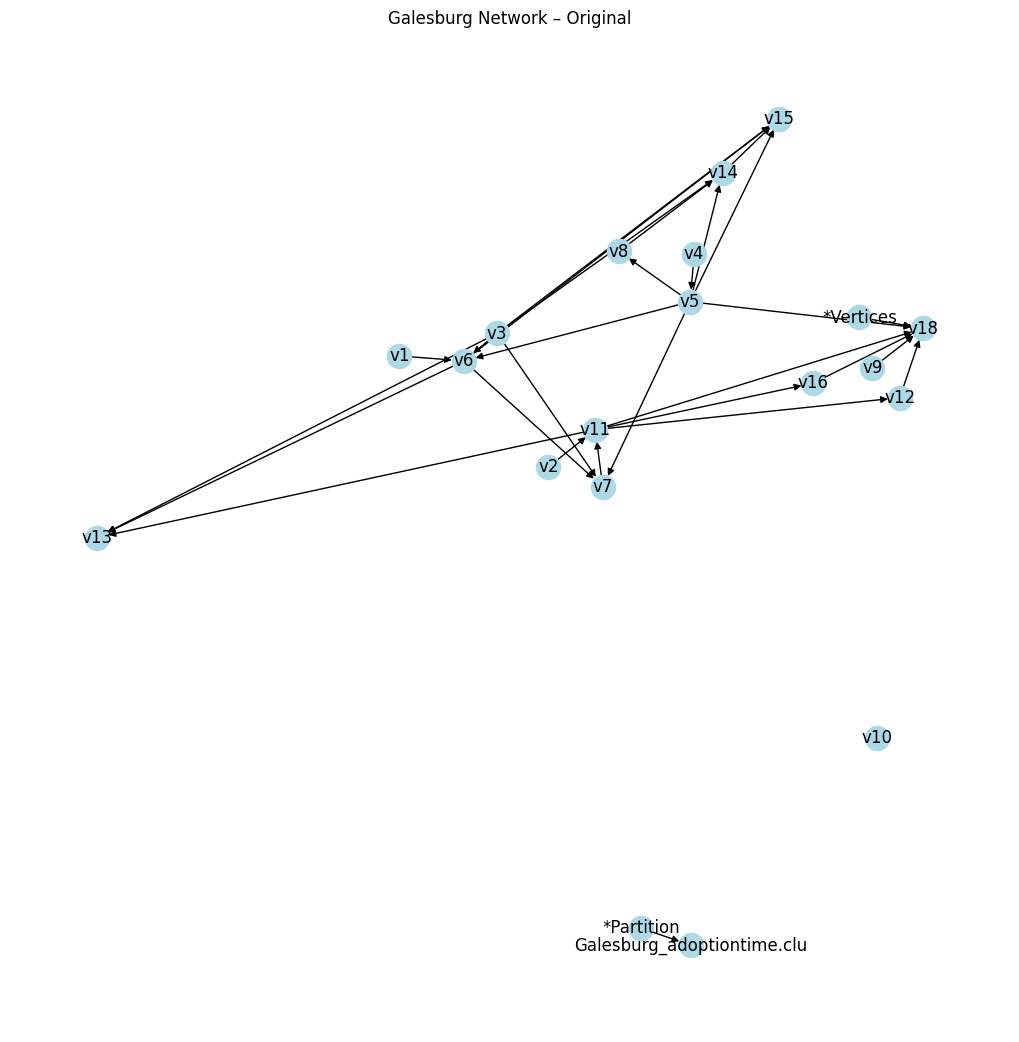

In [40]:
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw(G, pos, node_color="lightblue", with_labels=True)
plt.title("Galesburg Network – Original")
plt.show()


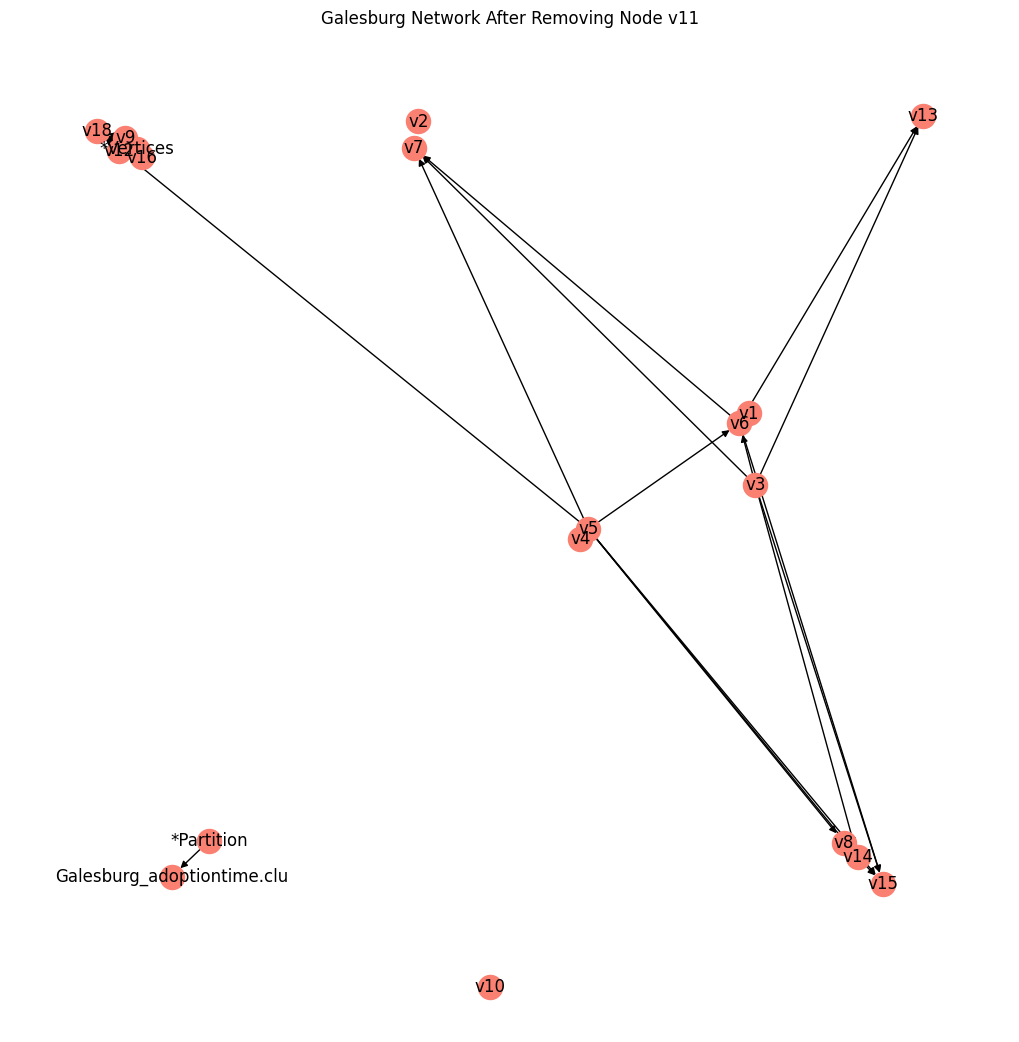

In [34]:
node_to_remove = 'v11'
G_removed = G.copy()
G_removed.remove_node(node_to_remove)

plt.figure(figsize=(10,10))
nx.draw(G_removed, pos, node_color="salmon", with_labels=True)
plt.title(f"Galesburg Network After Removing Node {node_to_remove}")
plt.show()


**How does the graph differ? **
Before the removal of v11 (the point with the highest betweeness centrality). This node, v11, centrally positioned, connecting the upper-left cluster (v7, v9, v12, v16, v18) to the main cluster containing v1, v3, v5, v6, and v13. After the removal of v11 we see a reduction in the number of edges in the network.

The network is still connected after this removal, however some pathways become longer and weaker. Most point have lost their connection to the central structure of the network and rely on indirect routes.

The whole network seems more stretched but does not necesarily fragment the network as I had expected.
What makes v11 the weakest link, even though having the highest centrality, is that if it fails or is disrupted the flow of the whole network is impacted. This makes it a vulnerable point.